In [1]:
import numpy as np
import pandas as pd

In [27]:
data = pd.read_csv("ecg.csv", header=None)
data.columns = ["measure_{}".format(i) for i in data.columns]
data = data.rename(columns = {"measure_140" : "target"})
data.head()

,measure_0,measure_1,measure_2,measure_3,measure_4,measure_5,measure_6,measure_7,measure_8,measure_9,...,measure_131,measure_132,measure_133,measure_134,measure_135,measure_136,measure_137,measure_138,measure_139,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


On sait que target = 0 si le patient est en bonne santé, et target = 1 s'il y a une anomalie.

In [15]:
data.shape

(4998, 141)

In [17]:
data["target"].describe()

count    4998.000000
mean        0.584034
std         0.492937
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [25]:
data.groupby("target")["measure_0"].count()

target
0.0    2079
1.0    2919
Name: measure_0, dtype: int64

In [29]:
data.head()

,measure_0,measure_1,measure_2,measure_3,measure_4,measure_5,measure_6,measure_7,measure_8,measure_9,...,measure_131,measure_132,measure_133,measure_134,measure_135,measure_136,measure_137,measure_138,measure_139,target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


## Entraînement d'une SVM à noyau gaussien

In [35]:
X = data.drop(columns = "target").values
y = data["target"].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # On sépare en training set et testing set

In [38]:
from sklearn.preprocessing import StandardScaler # On scale nos données
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.svm import SVC # On entraine notre svm
svm = SVC(kernel = "rbf", gamma=50, probability=True)
svm.fit(X_train_scaled, y_train)

SVC(gamma=50, probability=True)

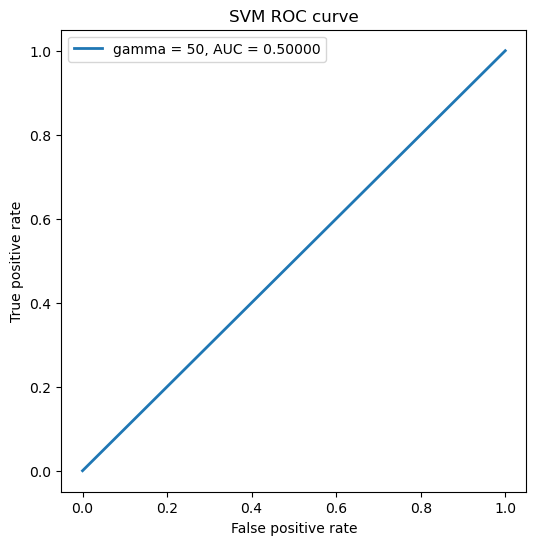

In [49]:
# On va maintenant construire la courbe roc
y_pred = svm.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, "-", lw=2, label="gamma = 50, AUC = %.5f" % area)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("SVM ROC curve")
plt.legend()
plt.show()

C'est très décevant (en fait, employons les termes : c'est de la merde.)

Tentons de faire mieux.

In [51]:
from sklearn.model_selection import GridSearchCV

params_grid = {"C" : np.logspace(-2,3, 6),
              "gamma" : np.logspace(-2, 1, 4)}

score = "roc_auc"

grid = GridSearchCV(SVC(kernel="rbf"),
                   params_grid,
                   cv = 5,
                   n_jobs = -1,
                   scoring = score,
                   verbose = 1)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='roc_auc', verbose=1)

In [52]:
grid.best_params_

{'C': 10.0, 'gamma': 0.01}

In [55]:
results = pd.DataFrame(grid.cv_results_)
results = results.drop(columns = [i for i in results.columns if "split" in i])
results.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,mean_test_score,std_test_score,rank_test_score
12,0.808720,0.148704,0.108924,0.021545,10.0,0.01,"{'C': 10.0, 'gamma': 0.01}",0.999137,0.000927,1
16,0.844014,0.119854,0.112530,0.030310,100.0,0.01,"{'C': 100.0, 'gamma': 0.01}",0.999056,0.000990,2
20,0.606531,0.069826,0.074233,0.018044,1000.0,0.01,"{'C': 1000.0, 'gamma': 0.01}",0.999056,0.000990,2
8,0.758858,0.156439,0.128609,0.036515,1.0,0.01,"{'C': 1.0, 'gamma': 0.01}",0.999046,0.000957,4
4,1.235755,0.166034,0.205918,0.073366,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.999017,0.000818,5
9,7.246743,0.915693,0.956471,0.092082,1.0,0.1,"{'C': 1.0, 'gamma': 0.1}",0.998790,0.001059,6
21,7.289941,0.379202,1.074599,0.245519,1000.0,0.1,"{'C': 1000.0, 'gamma': 0.1}",0.998767,0.001073,7
13,7.330119,0.498728,1.044586,0.100594,10.0,0.1,"{'C': 10.0, 'gamma': 0.1}",0.998767,0.001073,7
17,7.044345,0.843886,0.941356,0.106418,100.0,0.1,"{'C': 100.0, 'gamma': 0.1}",0.998767,0.001073,7
5,6.828792,1.063763,1.422542,0.387858,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.998631,0.001155,10


In [56]:
# On entraine donc un modèle avec les bons paramètres, et c'est gagné !